In [1]:
import torch
import torch.nn as nn
import utils
import dropout

In [2]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))

print("Example of application of dropout:")
print("dropout of 0:", dropout.dropout_layer(X, 0))
print("dropout of 0.5:", dropout.dropout_layer(X, 0.5))
print("dropout of 1:", dropout.dropout_layer(X, 1))
print("\n\n")

Example of application of dropout:
dropout of 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout of 0.5: tensor([[ 0.,  0.,  4.,  6.,  0.,  0., 12.,  0.],
        [16., 18.,  0., 22., 24., 26.,  0., 30.]])
dropout of 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])





In [3]:
hyperparameters = {
    "input_size": 784, "output_size": 10,
    "num_hiddens1": 256, "num_hiddens2": 256,
    "dropout1": 0.5, "dropout2": 0.5
}

learning_rate = 0.1
data = utils.MnistData()
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Dropout from scratch
Training on cuda
Epoch [1/10] loss: 1.16571, acc: 0.57667, eval_loss: 0.69193, eval_acc: 0.74430
Epoch [2/10] loss: 0.68737, acc: 0.75375, eval_loss: 0.56115, eval_acc: 0.79400
Epoch [3/10] loss: 0.58053, acc: 0.79453, eval_loss: 0.53759, eval_acc: 0.80670
Epoch [4/10] loss: 0.52745, acc: 0.81270, eval_loss: 0.46865, eval_acc: 0.82810
Epoch [5/10] loss: 0.49411, acc: 0.82598, eval_loss: 0.48188, eval_acc: 0.82370
Epoch [6/10] loss: 0.47084, acc: 0.83358, eval_loss: 0.45198, eval_acc: 0.83560
Epoch [7/10] loss: 0.45213, acc: 0.83988, eval_loss: 0.43184, eval_acc: 0.84290
Epoch [8/10] loss: 0.44099, acc: 0.84323, eval_loss: 0.42875, eval_acc: 0.84120
Epoch [9/10] loss: 0.42830, acc: 0.84625, eval_loss: 0.40210, eval_acc: 0.85430
Epoch [10/10] loss: 0.42009, acc: 0.85013, eval_loss: 0.40596, eval_acc: 0.85260


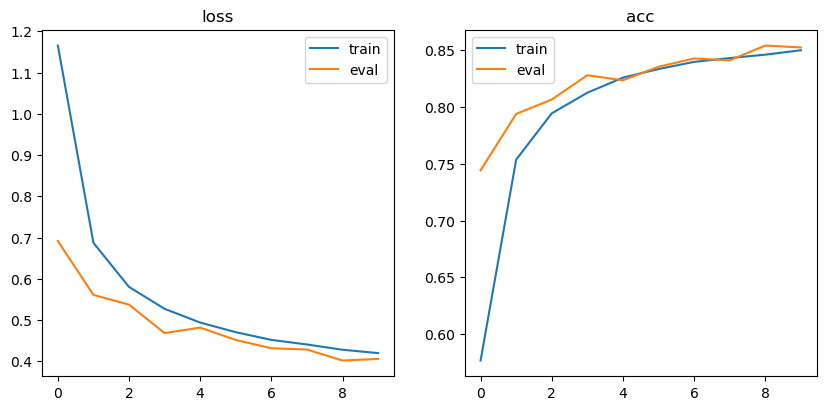

In [4]:
print("Dropout from scratch")
dropout_mlp_from_scratch = dropout.DropoutMLPScratch(**hyperparameters)

tracks_mlp_from_scratch = utils.train(
    model = dropout_mlp_from_scratch,
    optimizer=torch.optim.SGD(params=dropout_mlp_from_scratch.parameters(), lr=learning_rate),
    criterion=nn.CrossEntropyLoss(), data=data, epochs=num_epochs, device=device
)

utils.plot_loss_and_metric(tracks_mlp_from_scratch)

Concise dropout
Training on cuda
Epoch [1/10] loss: 1.16707, acc: 0.57387, eval_loss: 0.77908, eval_acc: 0.69190
Epoch [2/10] loss: 0.69328, acc: 0.75328, eval_loss: 0.57876, eval_acc: 0.78870
Epoch [3/10] loss: 0.58162, acc: 0.79668, eval_loss: 0.50646, eval_acc: 0.81610
Epoch [4/10] loss: 0.52736, acc: 0.81422, eval_loss: 0.50904, eval_acc: 0.81310
Epoch [5/10] loss: 0.49543, acc: 0.82668, eval_loss: 0.45332, eval_acc: 0.83600
Epoch [6/10] loss: 0.47110, acc: 0.83263, eval_loss: 0.44515, eval_acc: 0.83660
Epoch [7/10] loss: 0.45560, acc: 0.83895, eval_loss: 0.42433, eval_acc: 0.84510
Epoch [8/10] loss: 0.43717, acc: 0.84370, eval_loss: 0.41579, eval_acc: 0.84640
Epoch [9/10] loss: 0.42603, acc: 0.84737, eval_loss: 0.41463, eval_acc: 0.84670
Epoch [10/10] loss: 0.41443, acc: 0.85167, eval_loss: 0.40920, eval_acc: 0.84880


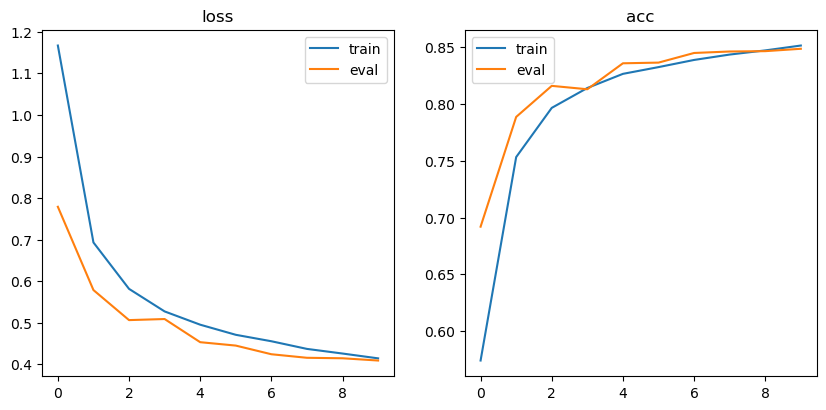

In [5]:
print("Concise dropout")
dropout_mlp = dropout.DropoutMLP(**hyperparameters)

tracks_mlp = utils.train(
    model = dropout_mlp,
    optimizer=torch.optim.SGD(params=dropout_mlp.parameters(), lr=learning_rate),
    criterion=nn.CrossEntropyLoss(), data=data, epochs=num_epochs, device=device
)

utils.plot_loss_and_metric(tracks_mlp)